In [1]:
import matplotlib
matplotlib.use('nbagg')
# %matplotlib notebook
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.INFO)
import numpy as np
import scipy
from scipy import signal

from stuffs.util import BladeDriver, rssi

In [26]:
f = 2405.35e6
fs = 2e6
bandwidth = 2e6
sdr = BladeDriver(fs=fs, bandwidth=bandwidth, frequency=f)

freq: 2405350001.0
fs: 2000000.0
bw: 2500000.0
RX_LNA: 6.0
RX_VGA1: 30.0
RX_VGA2: 30.0


<IPython.core.display.Javascript object>


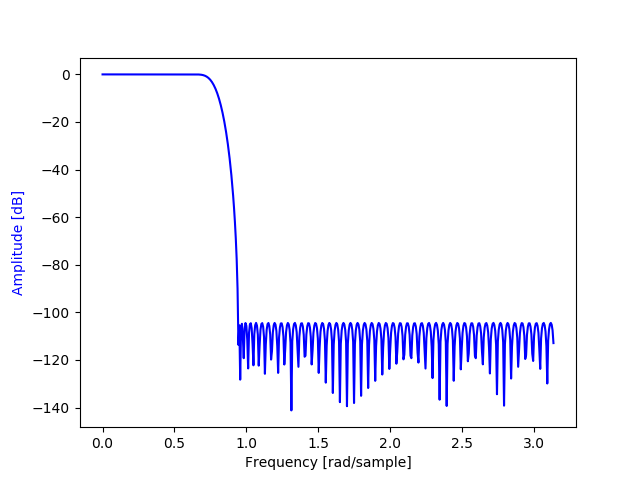

61.0


<IPython.core.display.Javascript object>


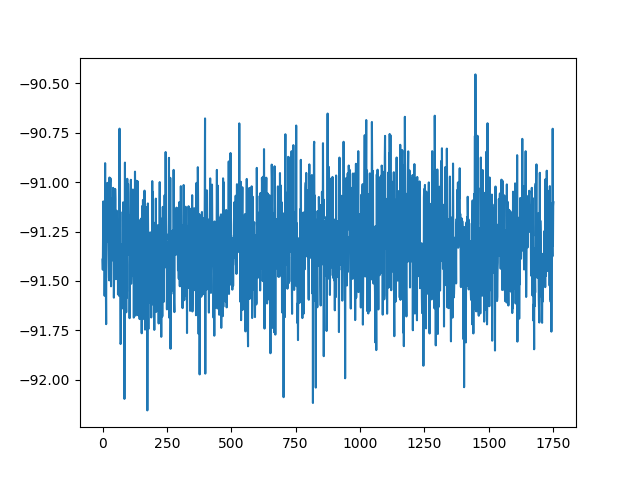

-91.3171421863


<IPython.core.display.Javascript object>


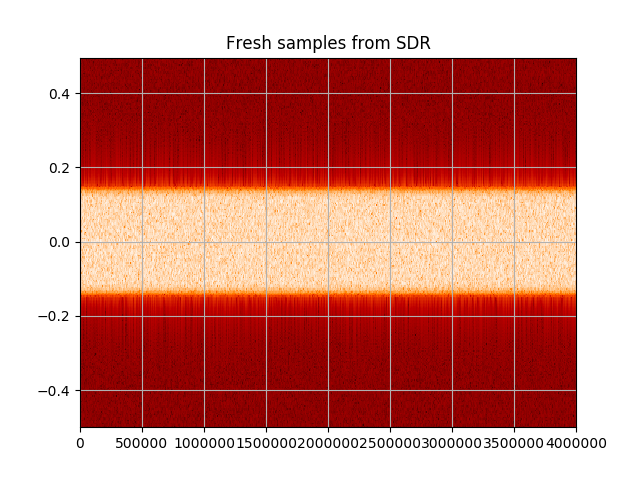

In [55]:
iq = sdr.get_samples(2)

b = signal.remez(128, [0, 0.1, 0.15, 0.5], [1, 0])
w, h = signal.freqz(b)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.show()

iq = signal.lfilter(b, [1.0], iq)

total_gain = sdr.get_total_rx_gain()
print(total_gain)
rs = rssi(iq, error=-5.1, gain_compensate=total_gain ,decimate=1024*2)[100:-100]
plt.plot(rs)
plt.show()
print(sum(rs) / len(rs))

Pxx, freqs, bins, im = plt.specgram(iq, cmap=plt.cm.gist_heat, Fs=1.0)
plt.title('Fresh samples from SDR')

plt.grid()
plt.show()


# wat = iq.astype(scipy.complex64)
# print(len(wat), len(iq))
# wat.tofile('/home/gaspar/tmp/data_aq_output.iq')